# Smart Courier Routing – Execution Notebook

This notebook runs and verifies the **CourierOptimizer** package.  
It demonstrates:

- Loading the package  
- Running the CLI  
- Showing output files (route.csv, metrics.csv, rejected.csv)  
- Verifying key functions such as haversine and validation  

The full code is implemented inside the `CourierOptimizer/ package.


### Import the Package Path

In [3]:
import sys

# Remove all cached imports from CourierOptimizer
for name in list(sys.modules.keys()):
    if name.startswith("CourierOptimizer"):
        del sys.modules[name]

# Add project path 
sys.path.insert(0, r"C:\Users\vpree\Smart_Courier_Routing")

print("Cache cleared.")
print("Package path added.")

Cache cleared.
Package path added.


## 1. Quick Function Tests
Basic checks to show the package functions work correctly.

In [5]:
from CourierOptimizer.core.haversine import haversine_distance

print("Test distance:", haversine_distance(59.91, 10.75, 60.10, 5.32))

Test distance: 302.5011384987124


In [6]:
from CourierOptimizer.core.validator import is_valid_lat

print("Valid lat (59.9):", is_valid_lat("59.9"))
print("Invalid lat (200):", is_valid_lat("200"))

Valid lat (59.9): True
Invalid lat (200): False


In [7]:
from CourierOptimizer.core.reader import read_deliveries

valid, rejected = read_deliveries("data/sample.csv")
print("Valid rows:", len(valid))
print("Rejected rows:", len(rejected))

Valid rows: 8
Rejected rows: 4


## 1.1 Automated Tests (Pytest)

The project includes a set of basic tests located in the `tests/` folder.

Below we run Pytest programmatically inside the notebook to verify:
- validation rules  
- CSV reading  
- transport modes  
- haversine distance  
- basic optimizer behavior  

This demonstrates that the core logic works as expected.

In [9]:
import pytest

print("Running tests...")
pytest.main(["-q"])

Running tests...
.....                                                                                                            [100%]
5 passed in 0.09s


<ExitCode.OK: 0>

## 2. Run Full CLI Optimization
This executes the complete routing logic along with pareto view

In [11]:
import importlib
import CourierOptimizer.core.optimizer
importlib.reload(CourierOptimizer.core.optimizer)

print("Optimizer reloaded directly.")

Optimizer reloaded directly.


In [12]:
from CourierOptimizer.cli.menu import run_cli

In [43]:
run_cli()

=== CourierOptimizer CLI ===



Enter path to CSV file (e.g., C:/Users/.../sample.csv):  C:\Users\vpree\Smart_Courier_Routing\data\sample.csv



Reading and validating deliveries...
Valid rows: 8
Rejected rows: 4

Enter depot coordinates:


Depot latitude:  59.8
Depot longitude:  10.7



Select transport mode:
1. Car
2. Bicycle
3. Walking


Enter choice (1-3):  1



Select optimization objective:
1. Fastest
2. Lowest Cost
3. Lowest CO2
4. Pareto (multi-objective)


Enter choice (1–4):  4



Running optimization...

Route saved to: C:\Users\vpree\Smart_Courier_Routing\output\route.csv
Metrics saved to: C:\Users\vpree\Smart_Courier_Routing\output\metrics.csv
Execution time: 0.0050 seconds
Route plot saved to: C:\Users\vpree\Smart_Courier_Routing\output\route_plot.png

=== Optimization Complete ===
Summary of totals:
Total distance: 52.88 km
Total time: 1.06 hours
Total cost: 211.51 NOK
Total CO2: 6345.31 g

Files saved in /output/:
 - route.csv
 - metrics.csv
 - rejected.csv
 - run.log
 - route_plot.png

Optimized route:
- Petter (lat=59.88, lon=10.76)
- John Doe (lat=59.91, lon=10.75)
- Maria (lat=59.9, lon=10.72)
- Kari Hansen (lat=59.889, lon=10.674)
- Ola Nordmann (lat=59.945, lon=10.756)
- Anders (lat=59.932, lon=10.743)
- Sofie (lat=59.913, lon=10.79)
- Lise (lat=59.94, lon=10.68)
- RETURN_TO_DEPOT (lat=59.8, lon=10.7)

Done.


## 3. Preview Output Files
The CLI generates:
- output/route.csv
- output/metrics.csv
- output/rejected.csv
- output/run.log
- output/route_plot.png

In [46]:
#Show route.csv
import pandas as pd
pd.read_csv("output/route.csv")

,customer,lat,lon,priority,distance_from_prev,cumulative_distance,eta_hours,cost,co2
0,Petter,59.880,10.760,High,9.506170,9.506170,0.190123,38.024682,1140.740452
1,John Doe,59.910,10.750,High,3.382152,12.888323,0.067643,13.528608,405.858249
2,Maria,59.900,10.720,Medium,2.008580,14.896903,0.040172,8.034322,241.029649
3,Kari Hansen,59.889,10.674,Medium,2.842282,17.739185,0.056846,11.369128,341.073832
4,Ola Nordmann,59.945,10.756,High,7.724199,25.463384,0.154484,30.896798,926.903935
5,Anders,59.932,10.743,Low,1.616757,27.080142,0.032335,6.467030,194.010886
6,Sofie,59.913,10.790,Medium,3.365074,30.445216,0.067301,13.460298,403.808937
7,Lise,59.940,10.680,Low,6.825096,37.270313,0.136502,27.300386,819.011569
8,RETURN_TO_DEPOT,59.800,10.700,-,15.607263,52.877576,0.312145,62.429053,1872.871587


In [48]:
#Show metrics.csv
pd.read_csv("output/metrics.csv")

,iteration,selected_customer,raw_distance,weighted_score,cumulative_distance,cumulative_time,cumulative_cost,cumulative_co2
0,1,Petter,9.506170,129.622338,9.506170,0.190123,38.024682,1140.740452
1,2,John Doe,3.382152,45.922861,12.888323,0.257766,51.553290,1546.598701
2,3,Maria,2.008580,51.359401,14.896903,0.297938,59.587612,1787.628350
3,4,Kari Hansen,2.842282,72.336075,17.739185,0.354784,70.956739,2128.702181
4,5,Ola Nordmann,7.724199,105.713394,25.463384,0.509268,101.853537,3055.606116
5,6,Anders,1.616757,51.983277,27.080142,0.541603,108.320567,3249.617002
6,7,Sofie,3.365074,85.964192,30.445216,0.608904,121.780865,3653.425939
7,8,Lise,6.825096,219.249397,37.270313,0.745406,149.081250,4472.437508


In [50]:
#Show any rejected rows
pd.read_csv("output/rejected.csv")

,customer,latitude,longitude,priority,weight_kg
0,InvalidLat,120.500,10.700,High,1 # invalid latitude
1,InvalidLon,59.900,200.000,Low,2 # invalid longitude
2,BadPriority,59.920,10.720,VeryHigh,1.5 # invalid priority
3,NegativeWeight,59.915,10.755,Medium,-2 # invalid weight


In [52]:
#Show run log
with open("output/run.log", "r") as f:
    print(f.read())

[2025-11-19 16:05:46] Logger test entry.
[2025-11-19 16:05:46] Total distance: 100.00 km
[2025-11-19 16:05:46] Total time: 2.00 hours
[2025-11-19 16:05:46] Total cost: 50.00 NOK
[2025-11-19 16:05:46] Total CO2: 0.00 g
[2025-11-19 16:05:46] Rejected rows saved to C:\Users\vpree\Smart_Courier_Routing\output\rejected.csv
[2025-11-19 16:33:10.910581] Logger test entry.
[2025-11-19 16:34:41.670200] Logger test entry.
[2025-11-19 16:34:41.670200] Total distance: 100.000 km
[2025-11-19 16:34:41.671203] Total time: 2.000 hours
[2025-11-19 16:34:41.671203] Total cost: 50.000 NOK
[2025-11-19 16:34:41.671203] Total CO2: 0.000 g
[2025-11-19 16:34:41.673204] 1 rejected rows saved to rejected.csv
[2025-11-19 16:58:58] Logger test entry.
[2025-11-19 16:58:58] Total distance: 100.000 km
[2025-11-19 16:58:58] Total time: 2.000 hours
[2025-11-19 16:58:58] Total cost: 50.000 NOK
[2025-11-19 16:58:58] Total CO2: 0.000 g
[2025-11-19 16:58:58] 1 rejected rows saved to rejected.csv
[2025-11-19 17:13:00] 4 re

## 4. View Route Plot

(-0.5, 2124.5, 1633.5, -0.5)

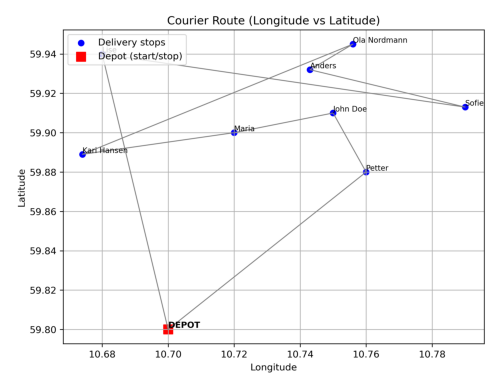

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("output/route_plot.png")
plt.imshow(img)
plt.axis("off")

## Notebook Complete

All package components have been verified successfully.  
The CLI, routing engine, validation logic, metrics, logging, and plotting all function as expected.